# **An overview of unsupervised learning**

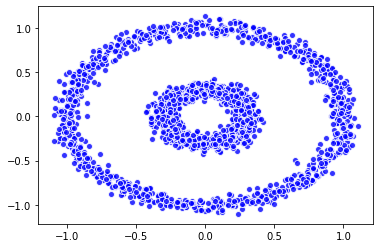

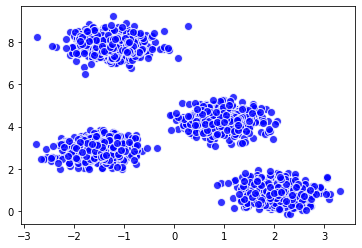

In [41]:
''' create the artificial datasets, and then let's represent them by a plot '''

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N_samples = 2000
# nos quedamos con el primer arreglo que es  el que tiene los puntos de datos 
# el segundo tine los variable de clasificacion pero en este cas ono nos interesa 
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples,
                     centers=4, cluster_std=0.4, random_state=0)[0])

plt.scatter(dataset_1[:,0], dataset_1[:,1], c='blue', alpha=0.8, edgecolors='white')
plt.show()
plt.scatter(dataset_2[:,0], dataset_2[:,1], alpha=0.8, s=64, c='blue', edgecolors='white')
plt.show()


## K-MEANS
Algoritmo de agrupación más utilizado,que funcioan de manera iterativa y  debe proporcionar al algoritmo el parámetro K, que es el número de conglomerados

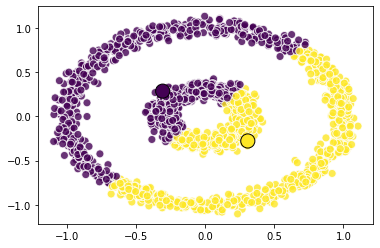

In [61]:
from sklearn.cluster import KMeans

km_1 = KMeans(n_clusters=2)
labels_1 = km_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=labels_1,
            alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_1.cluster_centers_[:, 0], km_1.cluster_centers_[:, 1],
            s=200, c=np.unique(labels_1), edgecolors='black')
plt.show()


Como se puede ver, **K-means** no funciona muy bien en este
conjunto de datos, porque espera clusters de datos con forma
esférica. Para este conjunto de datos, debería aplicarse un
KernelPCA antes de utilizar K-means.

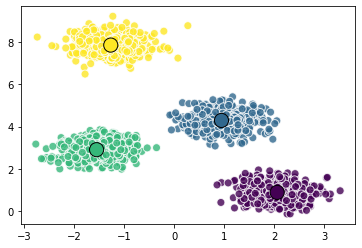

In [64]:
km_2 = KMeans(n_clusters=4)
labels_2 = km_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:, 0], dataset_2[:, 1], c=labels_2,
            alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1],
            s=200, c=np.unique(labels_2), edgecolors='black')
plt.show()

En casos del mundo real, puede considerar el uso del **Silhouette Coefficient** para tener
una idea de lo bien definidos que están los clusters. Se trata de una métrica de
evaluación de la coherencia dentro de los grupos, aplicable a diversos resultados de
agrupación e incluso a estructuras de clases en el aprendizaje supervisado. [more info](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

## DBSCAN – a density-basedclustering technique
Técnica de clustering basada en la densidad. 
 
1. Selecciona un punto al azar; si el punto está en una zona densa (si tiene más de N vecinos lo hacen),comienza a crecer el cluster, incluyendo todos los vecinos, y los vecinos de
los vecinos, hasta que llega a un punto en el que no hay más vecinos.

2. Si el punto no se encuentra en una zona densa, se clasifica como ruido
 
3. A continuación, se selecciona aleatoriamente otro punto sin etiquetar y el
proceso vuelve a empezar. 

 Esta técnica es excelente para los conglomerados no esféricos, pero funciona igual de bien con los esféricos.
La entrada es sólo el radio de vecindad (el parámetro *eps* , es decir, la
distancia máxima entre dos puntos que se consideran vecinos), y la salida
es la etiqueta de pertenencia al cluster de cada punto

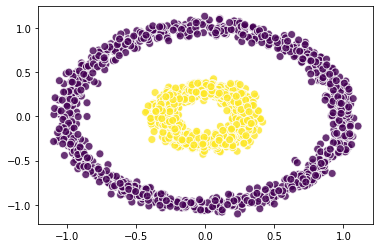

In [73]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.25)
labels_1 = dbs_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=labels_1,
            alpha=0.8, s=64, edgecolors='white')
plt.show()


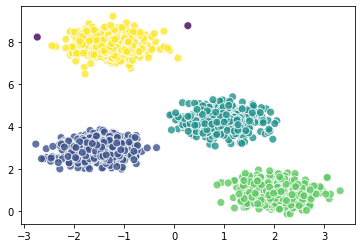

In [71]:
dbs_2 = DBSCAN(eps=0.5)
labels_2 = dbs_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, 
alpha=0.8, s=64, edgecolors='white')
plt.show()

En este segundo conjunto de datos clasificó dos puntos como ruido 

Tanto en **Kmeans** y **DBSCAN**, siempre hemos utilizado la distancia euclídea, ya que es la métrica
de distancia por defecto en estas funciones (aunque también se pueden utilizar otras
métricas de distancia si las considera apropiadas). Cuando utilice esta distancia en casos
reales, recuerde que tiene que normalizar cada característica **(normalización z)** para que
cada característica contribuya por igual a la distorsión final. 

---